In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split

In [2]:
# Load the training set.
train_df = pd.read_csv("train.csv")

In [3]:
# Load the test set.
test_df = pd.read_csv("test.csv")


Sales Price Statistical Summary:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

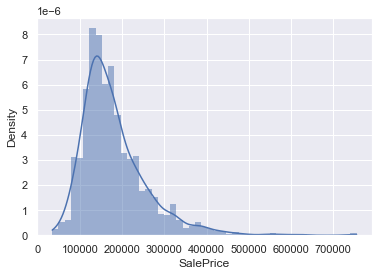

In [4]:
# Sales Price Analysis in the training set
print('\nSales Price Statistical Summary:\n',train_df['SalePrice'].describe())
# Histogram for sales price
sns.histplot(train_df['SalePrice'], kde=True, stat='density', linewidth=0)

Text(0.5, 1.04, 'Correlation coefficient heatmap')

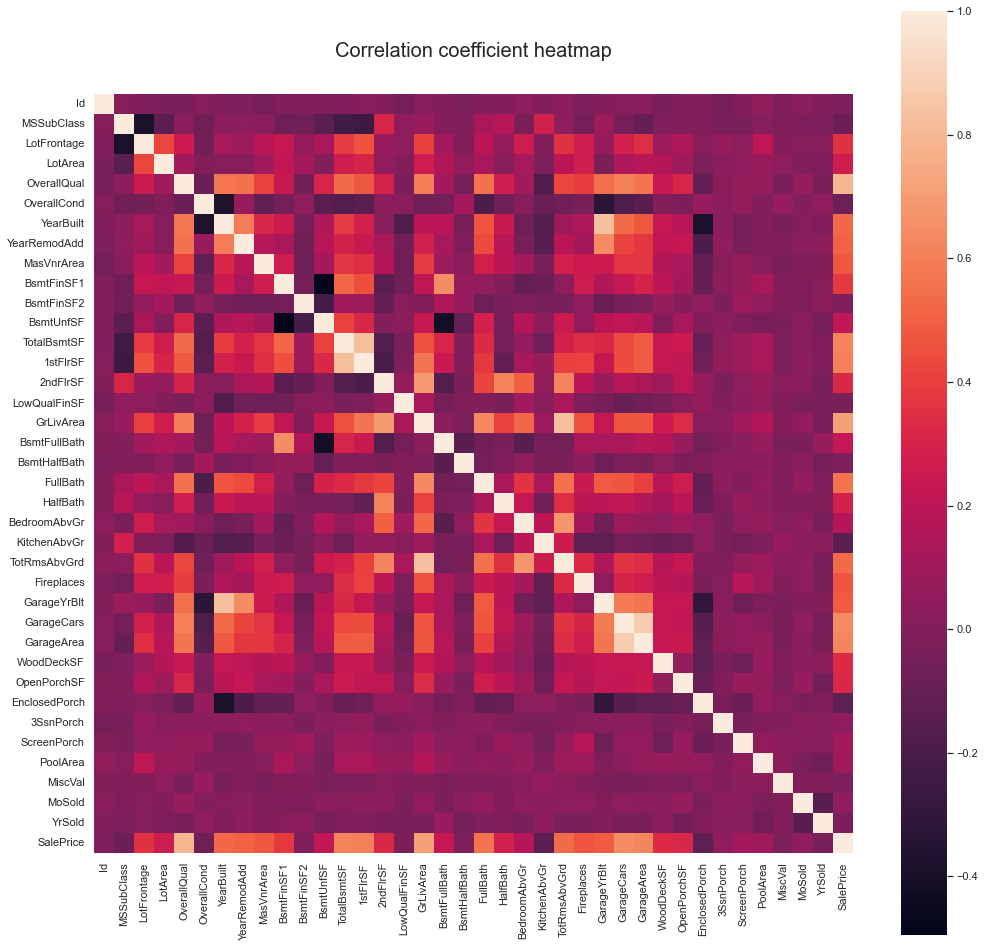

In [5]:
# Generate heatmap to see the correlation between features
correlation_map=train_df.corr()
plt.subplots(figsize=(17,17))
sns.heatmap(correlation_map, vmax=1, square=True)
plt.title('Correlation coefficient heatmap',fontsize=20,y=1.04)

In [6]:
# # order the variable in ascending order by correlation to see the features in the importance order
# correlation_train=train_df.corr()  
# corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
# important_columns=[]
# for key,value in corr_dict.items():
#     if ((value>0.1) & (value<0.9)) or (value<=-0.1):
#         important_columns.append(key)
# important_columns

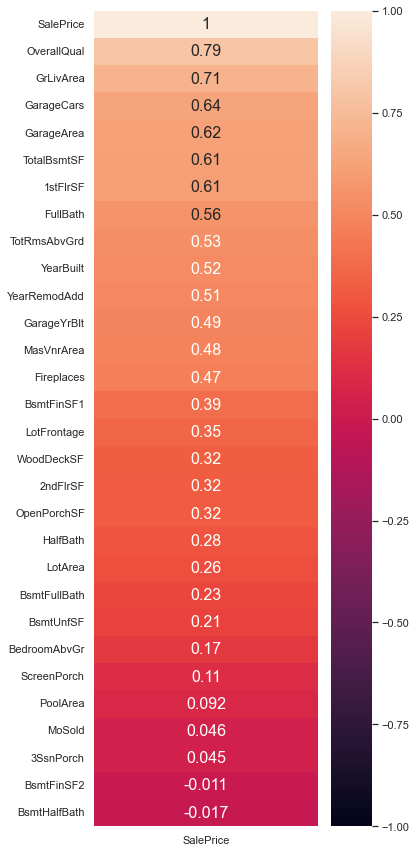

In [7]:
# Arrange the features in the importance order (the higher is the more important)
plt.figure(figsize=(5,15))
sns.heatmap(correlation_map[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, annot=True)
sns.set(font_scale=2)

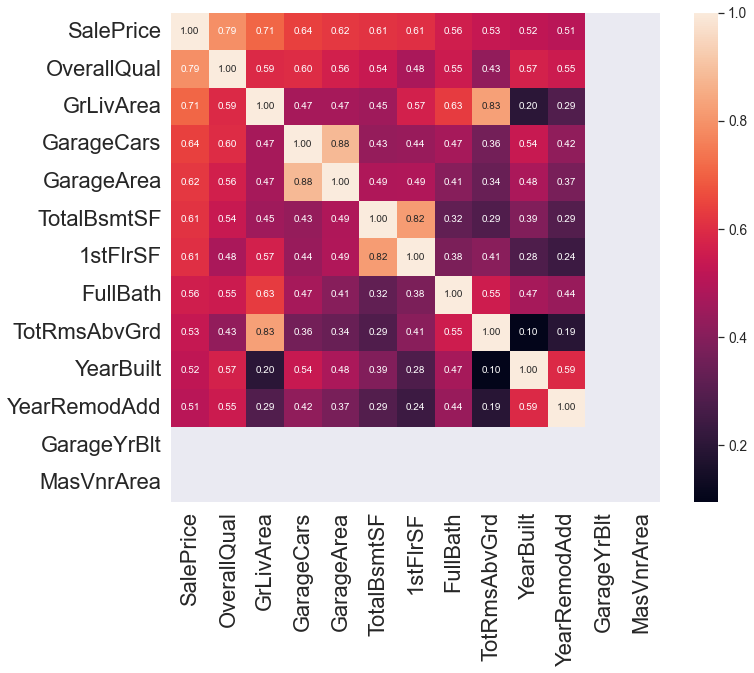

In [8]:
# saleprice correlation matrix
k = 13 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = correlation_map.nlargest(k, 'SalePrice')['SalePrice'].index
sns.set(font_scale=1.25)
sns.heatmap(np.corrcoef(train_df[cols].values.T), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
# Picked 9 most important features from the heat map
new_train = train_df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd',
                      'GarageYrBlt','MasVnrArea', 'SalePrice']]
new_test = test_df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd',
                      'GarageYrBlt','MasVnrArea']]
new_train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,SalePrice
0,7,1710,2,856,2,2003,2003,2003.0,196.0,208500
1,6,1262,2,1262,2,1976,1976,1976.0,0.0,181500
2,7,1786,2,920,2,2001,2002,2001.0,162.0,223500
3,7,1717,3,756,1,1915,1970,1998.0,0.0,140000
4,8,2198,3,1145,2,2000,2000,2000.0,350.0,250000


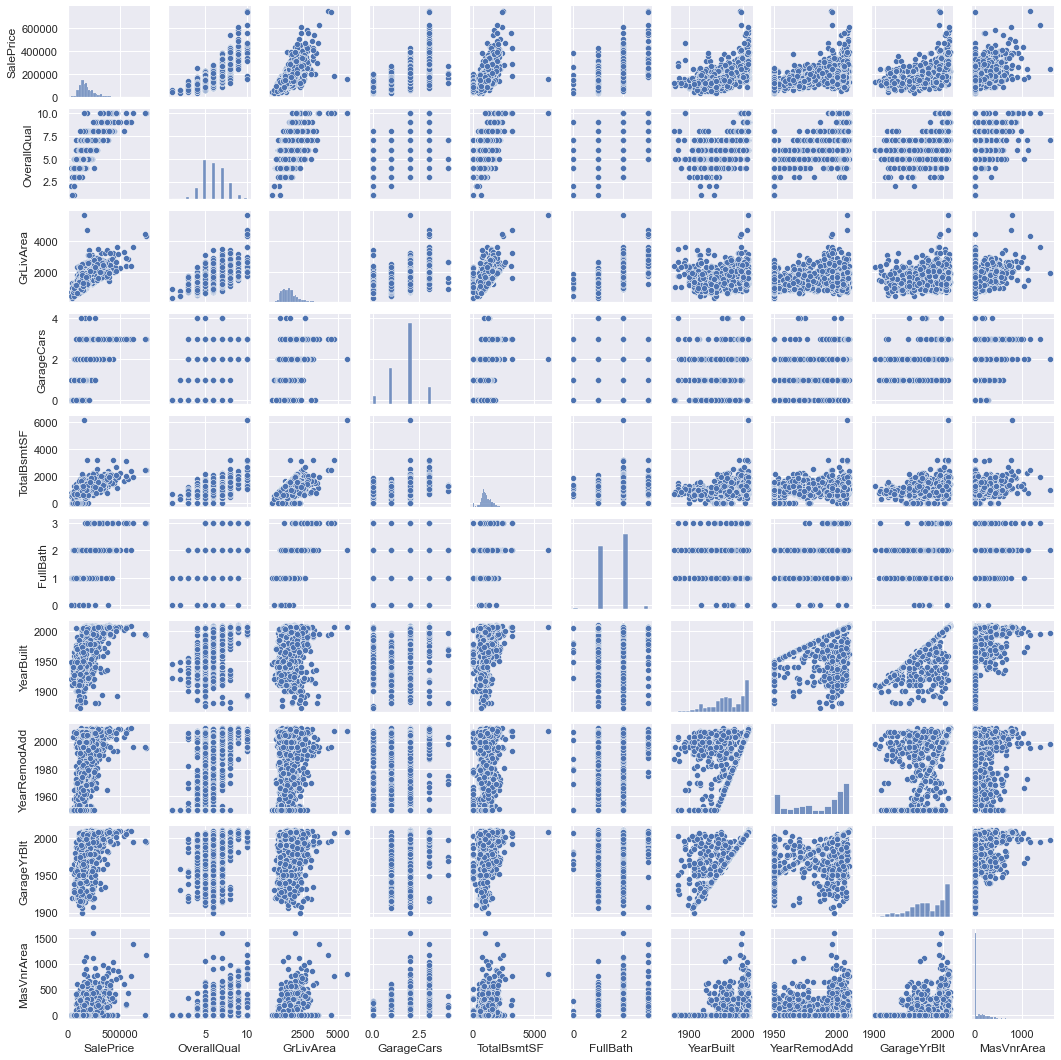

In [10]:
# Plot scatterplots for the features selected to see the graphical relationship between the features
sns.set()
column = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd',
                      'GarageYrBlt','MasVnrArea']
sns.pairplot(new_train[column], height = 1.5)
plt.show();

In [11]:
# Count how many 'NA' data points in 'GarageYrBlt' feature 
sum(new_train['GarageYrBlt'].isnull())

81

In [12]:
# Get mean value of GarageYrBlt 
avg_GarageYrBlt = np.mean(new_train['GarageYrBlt'])

In [13]:
# Replace 'NA' data points with mean of whole data points in 'GarageYrBlt' feature
new_train['GarageYrBlt'] = new_train['GarageYrBlt'].fillna(avg_GarageYrBlt)

/var/folders/d2/pn4y2yd50s1f6rw4q6f3h74r0000gn/T/ipykernel_5280/39600473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['GarageYrBlt'] = new_train['GarageYrBlt'].fillna(avg_GarageYrBlt)


In [14]:
# Count how many 'NA' data points in 'MasVnrArea' feature 
sum(new_train['MasVnrArea'].isnull())

8

In [15]:
# Get mean value of MasVnrArea
avg_MasVnrArea = np.mean(new_train['MasVnrArea'])

In [16]:
# Replace 'NA' data points with mean of whole data points in 'MasVnrArea' feature
new_train['MasVnrArea'] = new_train['MasVnrArea'].fillna(avg_MasVnrArea)

/var/folders/d2/pn4y2yd50s1f6rw4q6f3h74r0000gn/T/ipykernel_5280/3962251613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['MasVnrArea'] = new_train['MasVnrArea'].fillna(avg_MasVnrArea)


In [17]:
# Detect any outlier : Quantil based flooring and capping method
traindata_nosalesprice = new_train.drop(['SalePrice'],axis='columns')
def detect_outliers_zscore(data):
    outliers = []
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
outliers_overallqual = detect_outliers_zscore(traindata_nosalesprice['OverallQual'])
outliers_GrLivArea = detect_outliers_zscore(traindata_nosalesprice['GrLivArea'])
outliers_GarageCars = detect_outliers_zscore(traindata_nosalesprice['GarageCars'])
outliers_TotalBsmtSF = detect_outliers_zscore(traindata_nosalesprice['TotalBsmtSF'])
outliers_FullBath = detect_outliers_zscore(traindata_nosalesprice['FullBath'])
outliers_YearBuilt = detect_outliers_zscore(traindata_nosalesprice['YearBuilt'])
outliers_YearRemodAdd = detect_outliers_zscore(traindata_nosalesprice['YearRemodAdd'])
outliers_GarageYrBlt = detect_outliers_zscore(traindata_nosalesprice['GarageYrBlt'])
outliers_MasVnrArea = detect_outliers_zscore(traindata_nosalesprice['MasVnrArea'])

In [18]:
# Replace the outliers : Quantil based flooring and capping method
def replace_outlier(feature):
# Computing 10th, 90th percentiles and replacing the outliers
    tenth_percentile = np.percentile(traindata_nosalesprice[feature], 10)
    ninetieth_percentile = np.percentile(traindata_nosalesprice[feature], 90)
    print(tenth_percentile,ninetieth_percentile)
# print(tenth_percentile, ninetieth_percentile)
    b = np.where(traindata_nosalesprice[feature]<tenth_percentile, tenth_percentile, traindata_nosalesprice[feature])
    b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    print(feature,b)
# print("Overallqual:", traindata_nosalesprice['OverallQual'])
    dic = {'A': b}
    df_replace = pd.DataFrame(dic)
    traindata_nosalesprice[feature] = df_replace['A'].values
    
# print("Overallqual:", traindata_nosalesprice['OverallQual'])
    return traindata_nosalesprice
replace_outlier('OverallQual') 
replace_outlier('GrLivArea')  
replace_outlier('GarageCars') 
replace_outlier('TotalBsmtSF') 
replace_outlier('FullBath')
replace_outlier('YearBuilt') 
replace_outlier('YearRemodAdd')
replace_outlier('GarageYrBlt') 
replace_outlier('MasVnrArea')


5.0 8.0
OverallQual [7. 6. 7. ... 7. 5. 5.]
912.0 2158.3
GrLivArea [1710.  1262.  1786.  ... 2158.3 1078.  1256. ]
1.0 3.0
GarageCars [2. 2. 2. ... 1. 1. 1.]
636.9 1602.2000000000003
TotalBsmtSF [ 856. 1262.  920. ... 1152. 1078. 1256.]
1.0 2.0
FullBath [2. 2. 2. ... 2. 1. 1.]
1924.9 2006.0
YearBuilt [2003. 1976. 2001. ... 1941. 1950. 1965.]
1950.0 2006.0
YearRemodAdd [2003. 1976. 2002. ... 2006. 1996. 1965.]
1948.0 2006.0
GarageYrBlt [2003. 1976. 2001. ... 1948. 1950. 1965.]
0.0 335.0
MasVnrArea [196.   0. 162. ...   0.   0.   0.]


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea
0,7.0,1710.0,2.0,856.0,2.0,2003.0,2003.0,2003.0,196.0
1,6.0,1262.0,2.0,1262.0,2.0,1976.0,1976.0,1976.0,0.0
2,7.0,1786.0,2.0,920.0,2.0,2001.0,2002.0,2001.0,162.0
3,7.0,1717.0,3.0,756.0,1.0,1924.9,1970.0,1998.0,0.0
4,8.0,2158.3,3.0,1145.0,2.0,2000.0,2000.0,2000.0,335.0
...,...,...,...,...,...,...,...,...,...
1455,6.0,1647.0,2.0,953.0,2.0,1999.0,2000.0,1999.0,0.0
1456,6.0,2073.0,2.0,1542.0,2.0,1978.0,1988.0,1978.0,119.0
1457,7.0,2158.3,1.0,1152.0,2.0,1941.0,2006.0,1948.0,0.0
1458,5.0,1078.0,1.0,1078.0,1.0,1950.0,1996.0,1950.0,0.0


In [19]:
# MasVnrArea, case shows outlier = 335, 335 = 90 percentile value, so its okay
detect_outliers_zscore(traindata_nosalesprice['MasVnrArea'])

[335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 333.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 328.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 328.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,
 335.0,


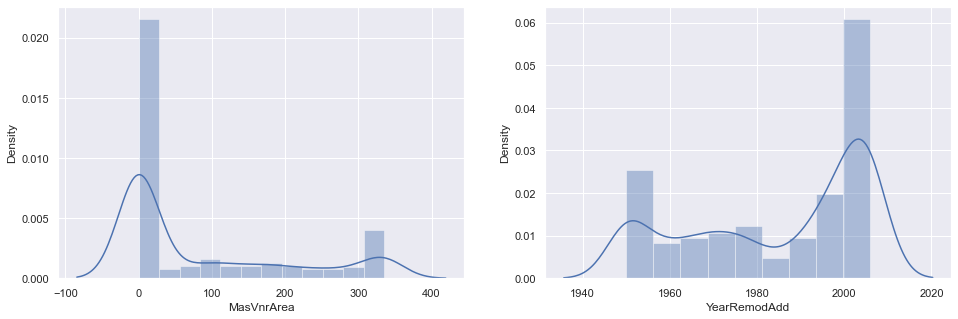

In [20]:
# Visualize each feature to see any outliers after Quantil based flooring and capping method
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(traindata_nosalesprice['MasVnrArea'])
plt.subplot(1,2,2)
sns.distplot(traindata_nosalesprice['YearRemodAdd'])
plt.show()

In [21]:
# # this method assumes our data distribution is in Normal distribution
# # if the model performance is low, then we can refer this point
# # 'OverallQual','GrLivArea','GarageCars','TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd',
# #                       'GarageYrBlt','MasVnrArea', 'SalePrice'
# import warnings
# warnings.filterwarnings('ignore')
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(new_train['YearRemodAdd'])
# plt.subplot(1,2,2)
# sns.distplot(new_train['GarageYrBlt'])
# plt.show()

In [22]:
# #  Finding the Boundary Values
# a = new_train['OverallQual'].mean() + 3*new_train['OverallQual'].std()
# b = new_train['OverallQual'].mean() - 3*new_train['OverallQual'].std()
# print("Highest allowed",a)
# print("Lowest allowed",b)

In [23]:
# # Finding the Outliers
# new_train[(new_train['OverallQual'] > a) | (new_train['OverallQual'] < b)]

In [24]:
# # Trimming of Outliers
# new_df = new_train[(new_train['OverallQual'] < a) & (new_train['OverallQual'] > b)]

In [25]:
# # Capping on Outliers
# upper_limit = new_train['OverallQual'].mean() + 3*new_train['OverallQual'].std()
# lower_limit = new_train['OverallQual'].mean() - 3*new_train['OverallQual'].std()

In [26]:
# # Now, apply the Capping
# new_train['OverallQual'] = np.where(
#     new_train['OverallQual']>upper_limit,
#     upper_limit,
#     np.where(
#         new_train['OverallQual']<lower_limit,
#         lower_limit,
#         new_train['OverallQual']
#     )
# )

In [27]:
# # test outlier
# new_train[(new_train['OverallQual'] > a) | (new_train['OverallQual'] < b)]

In [28]:
# https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

In [29]:
# def z_score_method(feature):
#     #  Finding the Boundary Values
#     a = new_train[feature].mean() + 3*new_train[feature].std()
#     b = new_train[feature].mean() - 3*new_train[feature].std()
#     print("Highest allowed",a)
#     print("Lowest allowed",b)
    
#     # Finding the Outliers
#     new_train[(new_train[feature] > a) | (new_train[feature] < b)]
#     # Trimming of Outliers
#     new_df = new_train[(new_train[feature] < a) & (new_train[feature] > b)]
#     # Capping on Outliers
#     upper_limit = new_train[feature].mean() + 3*new_train[feature].std()
#     lower_limit = new_train[feature].mean() - 3*new_train[feature].std()
#     # Now, apply the Capping
#     new_train[feature] = np.where(
#     new_train[feature]>upper_limit,
#     upper_limit,
#     np.where(
#         new_train[feature]<lower_limit,
#         lower_limit,
#         new_train[feature]
#     )
#     )
#     # Now see the statistics using “Describe” Function
# #     new_train[feature].describe()
#     return new_df

In [30]:
# without Sales Price but cleaned data
traindata_nosalesprice


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea
0,7.0,1710.0,2.0,856.0,2.0,2003.0,2003.0,2003.0,196.0
1,6.0,1262.0,2.0,1262.0,2.0,1976.0,1976.0,1976.0,0.0
2,7.0,1786.0,2.0,920.0,2.0,2001.0,2002.0,2001.0,162.0
3,7.0,1717.0,3.0,756.0,1.0,1924.9,1970.0,1998.0,0.0
4,8.0,2158.3,3.0,1145.0,2.0,2000.0,2000.0,2000.0,335.0
...,...,...,...,...,...,...,...,...,...
1455,6.0,1647.0,2.0,953.0,2.0,1999.0,2000.0,1999.0,0.0
1456,6.0,2073.0,2.0,1542.0,2.0,1978.0,1988.0,1978.0,119.0
1457,7.0,2158.3,1.0,1152.0,2.0,1941.0,2006.0,1948.0,0.0
1458,5.0,1078.0,1.0,1078.0,1.0,1950.0,1996.0,1950.0,0.0


In [31]:
# with sales price but not-cleaned data
new_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [32]:
# combine those two
# -> you will have a complete data set. Training set

In [33]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
X = np.asarray(traindata_nosalesprice)

In [35]:
X

array([[7.0000e+00, 1.7100e+03, 2.0000e+00, ..., 2.0030e+03, 2.0030e+03,
        1.9600e+02],
       [6.0000e+00, 1.2620e+03, 2.0000e+00, ..., 1.9760e+03, 1.9760e+03,
        0.0000e+00],
       [7.0000e+00, 1.7860e+03, 2.0000e+00, ..., 2.0020e+03, 2.0010e+03,
        1.6200e+02],
       ...,
       [7.0000e+00, 2.1583e+03, 1.0000e+00, ..., 2.0060e+03, 1.9480e+03,
        0.0000e+00],
       [5.0000e+00, 1.0780e+03, 1.0000e+00, ..., 1.9960e+03, 1.9500e+03,
        0.0000e+00],
       [5.0000e+00, 1.2560e+03, 1.0000e+00, ..., 1.9650e+03, 1.9650e+03,
        0.0000e+00]])

In [36]:
Y= np.asarray(new_train['SalePrice'])

In [37]:
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [40]:
X_train

array([[6.00000000e+00, 1.05400000e+03, 2.00000000e+00, ...,
        1.96300000e+03, 1.96300000e+03, 1.56000000e+02],
       [5.00000000e+00, 1.12000000e+03, 1.00000000e+00, ...,
        2.00600000e+03, 1.97850616e+03, 0.00000000e+00],
       [7.00000000e+00, 1.61600000e+03, 3.00000000e+00, ...,
        2.00500000e+03, 2.00500000e+03, 2.28000000e+02],
       ...,
       [5.00000000e+00, 9.12000000e+02, 2.00000000e+00, ...,
        1.99000000e+03, 1.95700000e+03, 0.00000000e+00],
       [7.00000000e+00, 1.42600000e+03, 1.00000000e+00, ...,
        1.99800000e+03, 1.94800000e+03, 0.00000000e+00],
       [7.00000000e+00, 1.55500000e+03, 3.00000000e+00, ...,
        2.00600000e+03, 2.00600000e+03, 1.30000000e+02]])

In [41]:
y_train

array([137500, 147000, 232000, 156000, 170000,  82500, 155000, 424870,
       236500, 218000, 213000, 312500, 187000, 181000, 233000,  95000,
        52000, 181000, 501837,  88000, 112000, 140000, 167000, 145250,
       210000, 157500, 212900, 117500, 185500,  85000, 145000, 255500,
       124000, 134900, 230500, 110000, 233230, 157000, 142600, 154000,
       179665,  91000, 197900, 205000, 161000, 149900, 207000, 143000,
       281000, 372500, 235000, 214500, 260000, 149700, 131000, 144000,
       215000, 176000, 144000, 155000, 290000, 230000, 290000, 328900,
       142000, 231500, 162000, 133000, 386250, 110500, 339750,  87000,
       158500, 170000,  55000, 138887, 170000, 240000, 147400, 289000,
       135000, 140000, 333168, 146500, 354000, 143000, 265900, 146000,
       165000,  82000, 213250,  79000, 143000, 130500, 239900, 177500,
       262280, 227000, 159500, 217000, 410000, 148000, 178000, 162900,
       187500, 160000, 212000, 139000, 108000,  84000, 172000, 104900,
      

In [42]:
pip install xgboost

You should consider upgrading via the '/Users/yuyang/miniconda3/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
#we will first use xgboost to train the model
from xgboost import XGBRegressor

In [44]:
xgb = XGBRegressor(nthread=-1)

In [45]:
params_xgb = {
    'n_estimators':[20],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,9)],
    'max_depth': [3,4,6],
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
n_iter_search = 30
random_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
param_rf = {'bootstrap': [True],
           'max_depth': [30, 40, 50, 60, 70],
           'max_features': ['auto'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180]}

In [50]:
estimator = RandomForestRegressor(n_jobs=-1, random_state=42, max_features='auto')

In [51]:
random_rf= RandomizedSearchCV(estimator, param_rf, scoring='accuracy', cv=5, n_jobs=-1, refit=True, random_state=42,
                                                          n_iter=5000, return_train_score=True)

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
loss = ['ls', 'lad', 'huber']
n_estimators = [ 500, 900, 1100]
max_depth = [ 3, 5, 10]
min_samples_leaf = [2, 4, 6] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto']

In [54]:

gb = GradientBoostingRegressor()
param_gb = {'loss': loss,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split,
            'max_features': max_features}

random_gb = RandomizedSearchCV(estimator=gb,
            param_distributions=param_gb,
            cv=4, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [55]:
from sklearn.svm import SVR
param_svm = {'kernel': ('linear', 'rbf','poly'),
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
random_svm = RandomizedSearchCV(svr,param_svm, cv= 4,scoring='accuracy')

In [56]:
random_xgb.fit(X_train,y_train)
random_rf.fit(X_train,y_train)
random_gb.fit(X_train,y_train)
random_svm.fit(X_train,y_train)
best_regressor_xgb = random_xgb.best_estimator_
best_regressor_rf = random_rf.best_estimator_
best_regressor_gb = random_gb.best_estimator_
best_regressor_svm = random_svm.best_estimator_

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
  

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
  

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  Fil

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_sel

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/metric

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:293

/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/yuyang/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: Future

[CV 2/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500;, score=(train=-11826.906, test=-23912.779) total time=   1.0s
[CV 3/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-11845.433, test=-22720.527) total time=   1.0s
[CV 4/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100;, score=(train=-11895.208, test=-18458.106) total time=   2.2s
[CV 3/4] END loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=(train=-8580.982, test=-23277.904) total time=   0.4s
[CV 3/4] END loss=lad, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-2539.512, test=-23622.513) total time=   8.3s
[CV 1/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500;, score

[CV 3/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=500;, score=(train=-11917.625, test=-22495.590) total time=   1.0s
[CV 2/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-11026.264, test=-24431.455) total time=   1.0s
[CV 3/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=1100;, score=(train=-10488.683, test=-22853.565) total time=   2.2s
[CV 4/4] END loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=(train=-9298.069, test=-20008.537) total time=   0.4s
[CV 4/4] END loss=lad, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-2303.016, test=-18110.693) total time=   8.8s
[CV 4/4] END loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500;, score

In [57]:
# Obtain predictions
y_pred_xgb = best_regressor_xgb.predict(X_test)
y_pred_rf = best_regressor_rf.predict(X_test)
y_pred_gb = best_regressor_gb.predict(X_test)
y_pred_svm = best_regressor_svm.predict(X_test)
#print(y_pred_xgb)
#print(y_pred_rf)
#print(y_pred_gb)
#print(y_pred_svm)
y_pred_xgb_mean = np.mean(y_pred_xgb)
y_pred_rf_mean = np.mean(y_pred_rf)
y_pred_gb_mean = np.mean(y_pred_gb)
y_pred_svm_mean = np.mean(y_pred_svm)
print(y_pred_xgb_mean)
print(y_pred_rf_mean)
print(y_pred_gb_mean)
print(y_pred_svm_mean)

178994.66
179281.7996037192
177897.9557280971
165002.34484720032


In [58]:
from sklearn.metrics import mean_squared_error
# Compute Root Mean Square Error(RMSE)
Rmse_pred_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
Rmse_pred_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
Rmse_pred_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))
Rmse_pred_svm = np.sqrt(mean_squared_error(y_test,y_pred_svm))
print(Rmse_pred_xgb)
print(Rmse_pred_rf)
print(Rmse_pred_gb)
print(Rmse_pred_svm)

35154.76620578157
34413.68334663718
36924.113263743406
86037.88563797204


<function matplotlib.pyplot.show(close=None, block=None)>

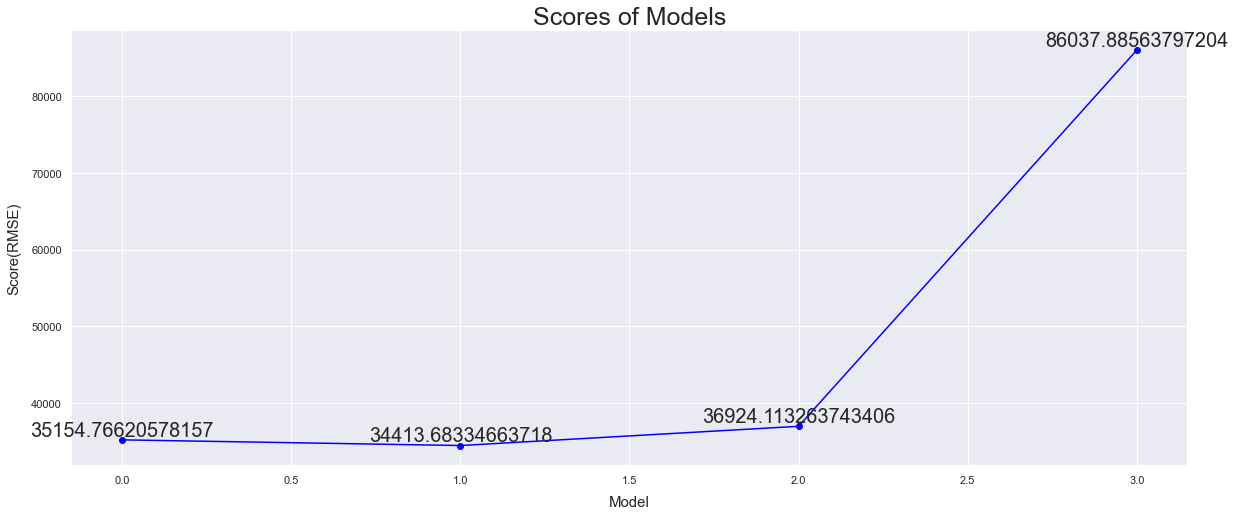

In [59]:
# Plot the RMSE of each model
fig = plt.figure(figsize=(20,8))
names = ['xgb','rf','gb','svm']
x = range(len(names))
y = [Rmse_pred_xgb,Rmse_pred_rf,Rmse_pred_gb,Rmse_pred_svm]
plt.plot(x, y, color = 'blue', marker = 'o',linestyle = '-')
plt.ylabel('Score(RMSE)', size = 15, labelpad = 10)
plt.xlabel('Model', size=15, labelpad = 10)
plt.title('Scores of Models', size = 25)

for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va = 'bottom',fontsize = 20)
plt.show

In [60]:
# RandomForest model got the lowest RMSE scores， so we will choose rf model to do prediction
y_pred_rf = best_regressor_rf.predict(X_test)
#print(y_pred_rf)
y_pred_rf.reshape(-1,1)
print(y_pred_rf.reshape(-1,1))
a = y_pred_rf.reshape(-1,1)


[[143943.84615385]
 [318116.61538462]
 [117175.        ]
 [169399.76923077]
 [273232.24615385]
 [ 83387.69230769]
 [199870.06923077]
 [151878.30769231]
 [ 83937.69230769]
 [112959.23076923]
 [154341.15384615]
 [118547.69230769]
 [108992.30769231]
 [214073.33076923]
 [193093.46153846]
 [125941.53846154]
 [192257.69230769]
 [137359.61538462]
 [114600.03076923]
 [193805.84615385]
 [180559.86153846]
 [202702.32307692]
 [169271.16923077]
 [127531.53846154]
 [187853.16153846]
 [169333.84615385]
 [201689.10769231]
 [100506.15384615]
 [189760.        ]
 [214418.73846154]
 [112490.        ]
 [245891.26153846]
 [186050.80769231]
 [118409.61538462]
 [268118.61538462]
 [135151.53846154]
 [160486.14615385]
 [207978.46153846]
 [351880.68461538]
 [ 92343.07692308]
 [123368.46153846]
 [234697.73076923]
 [113945.07692308]
 [398071.70769231]
 [127766.53846154]
 [150072.20769231]
 [127590.76923077]
 [113588.46153846]
 [427042.5557326 ]
 [140165.03846154]
 [110526.15384615]
 [184892.34615385]
 [116124.707

In [68]:
# Evaluate Function Random Search
def evaluate_performance(model, x_test, y_test):
    prediction = model.predict(x_test)
    error = abs(prediction - y_test)
    mape = 100 * np.mean(error / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(error)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [69]:
# Evaluate the Default Model 
base_Model = RandomForestRegressor(random_state=0)
base_Model.fit(X_train, y_train)
base_Accuracy = evaluate_performance(base_Model, X_test, y_test)

Model Performance
Average Error: 20939.3947 degrees.
Accuracy = 87.69%.


In [70]:
# Evaluate the Best Random Search Model

best_regressor_xgb = random_xgb.best_estimator_
best_regressor_rf = random_rf.best_estimator_
best_regressor_gb = random_gb.best_estimator_
best_regressor_svm = random_svm.best_estimator_

random_accuracy_xgb = evaluate_performance(best_regressor_xgb, X_test, y_test)
random_accuracy_rf = evaluate_performance(best_regressor_xgb, X_test, y_test)
random_accuracy_gb = evaluate_performance(best_regressor_gb, X_test, y_test)
random_accuracy_svm = evaluate_performance(best_regressor_svm, X_test, y_test)

Model Performance
Average Error: 20972.8942 degrees.
Accuracy = 87.84%.
Model Performance
Average Error: 20972.8942 degrees.
Accuracy = 87.84%.
Model Performance
Average Error: 21077.7267 degrees.
Accuracy = 87.77%.
Model Performance
Average Error: 56439.4769 degrees.
Accuracy = 67.42%.
